
<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> Introducción a la Bioinformática </h1>

<H2 align='center'> Tarea 1 </H2>
<H4 align='center'> Integrantes: </H4>
<br>

<div style="text-align:center;">
    <ul style="display:inline-block;">    
       <li>Giorgio Pellizari     rol: </li>
       <li>Juan Pablo Castillo rol: 201573534-4</li>
    </ul>
</div>
<hr style="height:2px;border:none"/>
<!-- \begin{center}
    \begin{itemize}
        \item Juan Pablo Castillo
        \item Giorgio Pellizzari
    \end{itemize}
\end{center} -->

## Pregunta 1

> Consulta: **GIQRGIQCASTILLQPELL**
<img src="img/query.PNG" title="Title text" width="80%" />

<!-- \begin{figure}
    \centering
    \includegraphics[width=0.8\textwidth]{img/query.PNG}
\end{figure} -->
 
>Parametros:
<img src="img/algorithm_parameters.PNG" title="Title text" width="80%" />

<!-- \begin{figure}
    \centering
    \includegraphics[width=0.8\textwidth]{img/algoruthm_parameters.PNG}
\end{figure} -->


> Resultado: **site-specific DNA-methyltransferase**
<img src="img/resultado_query.PNG" title="Title text" width="80%" />

<!-- \begin{figure}
    \centering
    \includegraphics[width=0.8\textwidth]{img/resultado_query.PNG}
\end{figure} -->


> Mejor resultado:
<img src="img/mejor_resultado.PNG" title="Title text" width="80%" />

<!-- \begin{figure}
    \centering
    \includegraphics[width=0.8\textwidth]{img/mejor_resultado.PNG}
\end{figure} -->


> Muestre dos dotplots entre su query (en la forma que se usó en la búsqueda) y un segmento
de la proteína encontrada, que incluya el match pero sea más largo que el query (digamos, 3
veces la longitud). El primer dotplot hágalo para las identidades (dotplot simple), y el
segundo hágalo indicando dos identidades en ventana de largo 3.

In [6]:
def delta(x,y):
    return 0 if x == y else 1

def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))

def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]

def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)

def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2) #experiment with character choice
    
Query = 'GIQRGIQCASTILLQPELL'
Rsequence = 'CKTLNRQFISSEIDEKYYNMILDRLNNGKIDEKYRLNINNREIQRGISTILRQPDLLK'

dotplot(Query, Rsequence)


 |CKTLNRQFISSEIDEKYYNMILDRLNNGKIDEKYRLNINNREIQRGISTILRQPDLLK
------------------------------------------------------------
G|                           ■                 ■            
I|        ■   ■       ■        ■       ■    ■   ■  ■        
Q|      ■                                    ■        ■     
R|     ■                 ■          ■     ■   ■      ■      
G|                           ■                 ■            
I|        ■   ■       ■        ■       ■    ■   ■  ■        
Q|      ■                                    ■        ■     
C|■                                                         
A|                                                          
S|         ■■                                    ■          
T|  ■                                             ■         
I|        ■   ■       ■        ■       ■    ■   ■  ■        
L|   ■                 ■  ■          ■              ■    ■■ 
L|   ■                 ■  ■          ■              ■    ■■ 
Q|      ■               

> Muestre el alineamiento que dio BLAST entre su nombre y el segmento de la proteína. 
<img src="img/alineamiento.PNG" title="Title text" width="70%" />

> ¿Qué función cumple la proteína? [Para la función: trate de averiguar; por ejemplo, si es una
“pitufasa”, trate de investigar que significa “pitufar”, o qué es la “pitufosis”]. ¿Se sabe con
certeza (base experimental), o es una conjetura? ¿Se conoce su estructura 3D? ¿Está
etiquetada como miembro de alguna familia de proteínas?

La proteína site-specific DNA methyltransferase ([N6_n4_Mtase](http://pfam.xfam.org/family/PF01555)), cumple la función de catalizar la transferencia de un grupo metilo al ADN. De la proteína se sabe con certeza que existe, y pertenece a la familia de proteinas DNA methylases. Su estructura 3D está dada por la siguiente figura:

<img src="img/3d_structure.PNG" title="Title text" width="50%" />

> El organismo en que la encontró: ¿qué es? (clasificación, descripción, imagen si es que
existe [Use The Google!]). 

El organismo en que se encontro es Candidatus [Acidulodesulfobacterium ferriphilum](https://lpsn.dsmz.de/species/acidulodesulfobacterium-ferriphilum) el cual es una proteobacteria que es muy abundante en ambientes extremadamente ricos en hierro y azufre, de los cuales la fisiologia, biodiversidad y funciones ecologicas se sabe muy poco.

> ¿Dónde y cómo está codificada la proteína? (Indique la ubicación de la CDS -"coding sequence"- de DNA que la codifica, y acaso está en la hebra primaria o secundaria, si es continua o tiene interrupciones, si está en cierto cromosoma, si es parte del genoma mitocondrial, etc.; incluya el código de acceso o URL de la secuencia de DNA).

La proteína se encuentra codificada entre las posiciones $240.414$ y $241.244$ de la hebra primaria, y sin interrupciones en el [CDS](https://www.ncbi.nlm.nih.gov/nuccore/1573781952) del organismo.

## Pregunta 2

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# random.seed(20)

bases = ['A', 'C', 'G', 'T', 'B', 'D']
mutations = ['insert', 'delete', 'replace']

In [3]:

def generateRandomSequence(bases, n = 200):
    sequence = []
    for i in range(n):
        b = random.choice(bases)
        sequence.append(b)
        
    return sequence

def randomMutation(sequence, bases, mutations):
    # Choose random mutation
    m = random.choice(mutations)
    position = random.randint(0, len(sequence)-1)
    aux_sequence = sequence.copy()
    if m == 'insert':
        b = random.choice(bases)
        aux_sequence = []
        j = 0
        for i in range(len(sequence) + 1):
            if i == position:
                aux_sequence.append(b)
            else:
                aux_sequence.append(sequence[j])
                j += 1
            
    elif m == 'delete':
        del aux_sequence[position]
        
    elif m == 'replace':
        eq_flag = True
        b = ''
        while eq_flag:
            b = random.choice(bases)
            if b != aux_sequence[position]:
                eq_flag = False
        
        aux_sequence[position] = b
            
    return aux_sequence
    
'''
The distance reflects the total number of single-character 
edits required to transform one word into another.
'''    
def levenshteinDistance(sequence_a, sequence_b):
    distances = np.zeros((len(sequence_a) + 1, len(sequence_b) + 1))
    
    for i in range(len(sequence_a) + 1):
        distances[i][0] = i
    
    for j in range(len(sequence_b) + 1):
        distances[0][j] = j
    
    a = 0
    b = 0
    c = 0
    
    for i in range(1, len(sequence_a) + 1):
        for j in range(1, len(sequence_b) + 1):
            if (sequence_a[i-1] == sequence_b[j-1]):
                distances[i][j] = distances[i - 1][j - 1]
            else:
                a = distances[i][j - 1]
                b = distances[i - 1][j]
                c = distances[i - 1][j - 1]
                
                if (a <= b and a <= c):
                    distances[i][j] = a + 1
                elif (b <= a and b <= c):
                    distances[i][j] = b + 1
                else:
                    distances[i][j] = c + 1

    return distances[len(sequence_a)][len(sequence_b)]
    
    
s1 = generateRandomSequence(bases)
s2 = generateRandomSequence(bases)
d = levenshteinDistance(s1, s2)
1 - d/len(s1)
# s_prim = randomMutation(s, bases, mutations)


0.355

>a) Generar una secuencia, y aplicar $M$ mutaciones; para $M$ entre 0 y 300, grafique la relación entre $M$ y $D$, donde $D$ es la distancia de Levenshtein entre la secuencia final y la secuencia inicial.

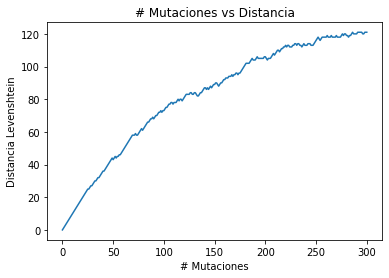

In [4]:
M = 300
D = []
sequence_i = generateRandomSequence(bases)
sequence_f = sequence_i.copy()
d = levenshteinDistance(sequence_i, sequence_f)
D.append(d)
for m in range(1, M+1):
    sequence_f = randomMutation(sequence_f, bases, mutations)
    d = levenshteinDistance(sequence_i, sequence_f)
    D.append(d)
    
plt.plot(range(M+1), D)
plt.title('# Mutaciones vs Distancia')
plt.xlabel('# Mutaciones')
plt.ylabel('Distancia Levenshtein')
plt.show()

>b) Genere una secuencia, clónela, y a cada copia aplíquele $M$ mutaciones (de modo que
tendrá dos secuencias crecientemente distintas). Grafique la relación entre $M$ y $D’$, donde $D’$
es la distancia entre las dos secuencias que están mutando.

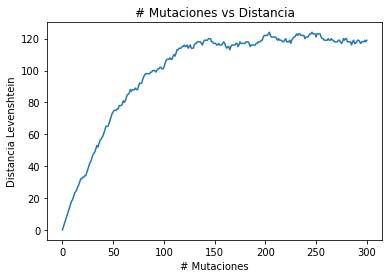

In [5]:
Dp = []
# Generate sequences
sequence_1 = generateRandomSequence(bases)
sequence_2 = sequence_1.copy()
d = levenshteinDistance(sequence_1, sequence_2)
Dp.append(d)
for m in range(1, M+1):
    sequence_1 = randomMutation(sequence_1, bases, mutations)
    sequence_2 = randomMutation(sequence_2, bases, mutations)
    d = levenshteinDistance(sequence_1, sequence_2)
    Dp.append(d)
    
plt.plot(range(M+1), Dp)
plt.title('# Mutaciones vs Distancia')
plt.xlabel('# Mutaciones')
plt.ylabel('Distancia Levenshtein')
plt.show()

>c) Genere $10.000$ pares de secuencias (largo $200$ c/u) y evalúe su distancia de Levenshtein;
haga un histograma de la distribución de estos valores, y calcule la media y $\sigma$.

In [28]:
# Generate 10.000 sequences with 200 bases
sequences1 = [generateRandomSequence(bases) for i in range(10000)]
sequences2 = [generateRandomSequence(bases) for i in range(10000)]
distances = []
for i in range(10000):
    s1 = sequences1[i]
    s2 = sequences2[i]
    d = levenshteinDistance(s1, s2)
    distances.append(d)

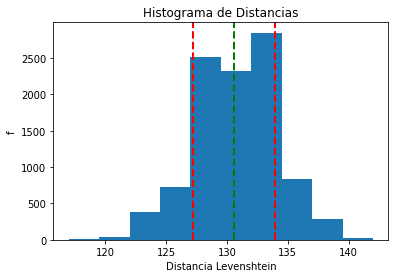

Media:  130.5429
sigma:  3.364950501744107


In [29]:
import statistics

avg = sum(distances)/len(distances)
std = statistics.stdev(distances)

plt.hist(distances)
plt.title('Histograma de Distancias')
plt.xlabel('Distancia Levenshtein')
plt.ylabel('f')
plt.axvline(avg, color='g', linestyle='dashed', linewidth=2)
plt.axvline(avg-std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(avg+std, color='r', linestyle='dashed', linewidth=2)
plt.show()
print('Media: ', avg)
print('sigma: ', std)

>d) Considerando (b) y (c), ¿por sobre qué valor de $M$ diría usted que el parentesco entre las
secuencias es indetectable (es decir, se entra en la twilight zone)? Tome en cuenta que cuando
la distancia ya está dentro de la twilight zone, hace rato que la capacidad de juzgar
parentesco ya se perdió.